# Example
This notebook shows an example of how to use this package.

## Step \# 1
Choose a stock and instantiate a Stock passing the ticker symbol.

In [18]:
#deactivate warning for aesthetic reasons
import warnings     
import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [19]:
from optionsPricingAndGreeks.stock import Stock

stock = Stock("MSFT")

## Step \#2
See the possible expiration days for the available options and select a day.
Then choose the type of option you would like to value and call the *getCallOptions* or *getPutOptions* methods passing the chosen expiration day as argument.
Finally choose the option to evaluate within the ones returned by the methods cited prevoiusly.

In [20]:
possibleDays = stock.possibleOptionExpirationDays()
chosenExpirationDay = possibleDays[4] #for example

callOptions = stock.getCallOptions(chosenExpirationDay)
for opt in callOptions: print(opt)

optionToEvaluate = callOptions[5] #for example

Type: CALL - Expiration: 2023-12-01 00:00:00 - Strike: 230.0 - Price: 102.8
Type: CALL - Expiration: 2023-12-01 00:00:00 - Strike: 235.0 - Price: 99.91
Type: CALL - Expiration: 2023-12-01 00:00:00 - Strike: 250.0 - Price: 90.6
Type: CALL - Expiration: 2023-12-01 00:00:00 - Strike: 260.0 - Price: 71.0
Type: CALL - Expiration: 2023-12-01 00:00:00 - Strike: 280.0 - Price: 61.82
Type: CALL - Expiration: 2023-12-01 00:00:00 - Strike: 285.0 - Price: 51.01
Type: CALL - Expiration: 2023-12-01 00:00:00 - Strike: 290.0 - Price: 55.8
Type: CALL - Expiration: 2023-12-01 00:00:00 - Strike: 295.0 - Price: 39.6
Type: CALL - Expiration: 2023-12-01 00:00:00 - Strike: 300.0 - Price: 33.35
Type: CALL - Expiration: 2023-12-01 00:00:00 - Strike: 305.0 - Price: 29.3
Type: CALL - Expiration: 2023-12-01 00:00:00 - Strike: 310.0 - Price: 24.32
Type: CALL - Expiration: 2023-12-01 00:00:00 - Strike: 315.0 - Price: 20.75
Type: CALL - Expiration: 2023-12-01 00:00:00 - Strike: 320.0 - Price: 16.69
Type: CALL - Expi

# Step \# 3
Instantiate one or more estimators and estimate the price of the option.

In [21]:
from optionsPricingAndGreeks.estimator.monteCarloEstimator import MonteCarloEstimator
from optionsPricingAndGreeks.estimator.blackScholesEstimator import BlackScholesEstimator

monteCarloEstimator = MonteCarloEstimator(stock)
blackScholesEstimator = BlackScholesEstimator(stock)
print(f"""
    MonteCarlo estimattion: {monteCarloEstimator.estimate(optionToEvaluate)}
    BlackScholes estimattion: {blackScholesEstimator.estimate(optionToEvaluate)}
    """)


    MonteCarlo estimattion: 45.290422751477315
    BlackScholes estimattion: 46.04980504896713
    


We can also look at the paths created for the stock price by the Monte Carlo estimator setting the parameter *showSimulationPaths* to True.
The number of simulations generated can be modified through the parameter *numberOfSimulations*, as well.

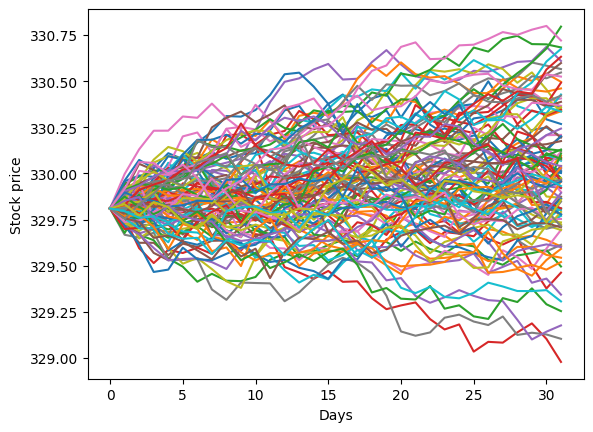

45.30996574321283

In [22]:
monteCarloEstimator.estimate(optionToEvaluate, numberOfSimulations=100, showSimulationPaths=True)

Finally we can calculate the greeks of the option using the GreeksEstimator class.

In [23]:
from optionsPricingAndGreeks.estimator.greeksEstimator import GreeksEstimator

greekEstimator = GreeksEstimator(stock=stock, option=optionToEvaluate)

print(f"""
    delta: {greekEstimator.delta:.4f}
    gamma: {greekEstimator.gamma:.4f}
    vega: {greekEstimator.vega:.4f}
    theta: {greekEstimator.theta:.4f}
    rho: {greekEstimator.rho:.4f}
""")


    delta: 0.7528
    gamma: 0.0120
    vega: 30.0905
    theta: -56.5230
    rho: 17.6061

